<h1>"Getting Data from the RAPID-API"</h1>

In [2]:
import requests
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [3]:
url = "https://alpha-vantage.p.rapidapi.com/query"

In [4]:
querystring = {
    "function": "TIME_SERIES_WEEKLY",
    "symbol": "MSFT",
    "outputsize": "compact",
    "datatype": "json"
}


In [5]:
headers = {
    "x-rapidapi-key": "536789e203mshc9112fa5a7cf1b9p146d89jsn18519573a272",
    "x-rapidapi-host": "alpha-vantage.p.rapidapi.com"
}

In [6]:
response = requests.get(url, headers=headers, params=querystring)
data = response.json()


In [7]:
if "Weekly Time Series" in data:
    df = pd.DataFrame.from_dict(data["Weekly Time Series"], orient="index")
    df.index = pd.to_datetime(df.index)  
    df = df.sort_index()  
    df.columns = ["Open", "High", "Low", "Close", "Volume"]  
    df = df.astype(float)  
else:
    print("Error retrieving data:", data)

In [8]:
df=df.reset_index()

In [9]:
df.sample(5)

,index,Open,High,Low,Close,Volume
37,2000-07-28,72.06,72.12,67.25,69.69,177871000.0
1058,2020-02-21,185.61,188.18,177.25,178.59,143313345.0
477,2009-01-02,19.15,20.40,18.64,20.33,198239900.0
835,2015-11-13,54.55,54.87,52.53,52.84,196522294.0
1321,2025-03-04,398.82,398.82,381.00,388.61,52350649.0


<h1>"DATA PREPROCESSING" && "EDA"</h1>

In [11]:
df=df.drop(columns=['index'])

<h3>"Null Value Detection"</h3>

In [13]:
df.isnull().sum() 

Open      0
High      0
Low       0
Close     0
Volume    0
dtype: int64

<h2>"Detecting for outliers"</h2>

<Axes: ylabel='Open'>

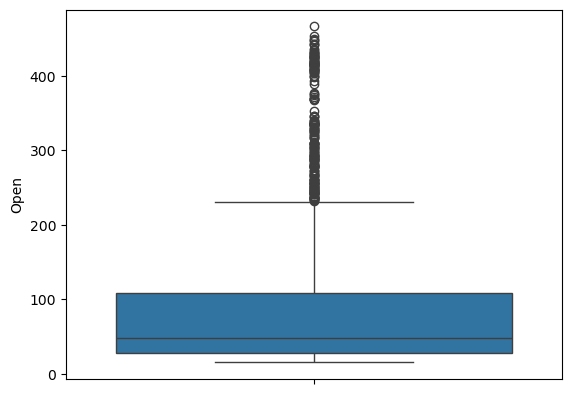

In [15]:
sns.boxplot(df['Open'])

In [16]:
df=df[df['Open']<350]

<Axes: ylabel='High'>

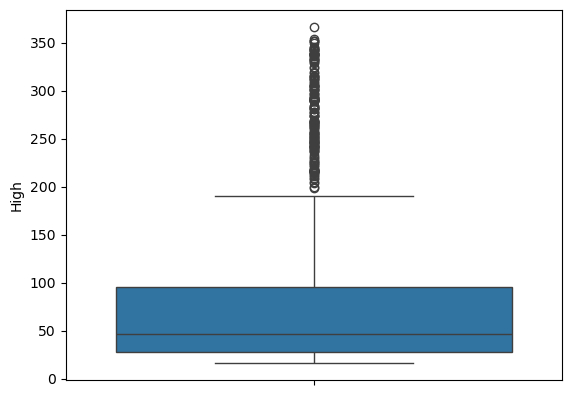

In [17]:
sns.boxplot(df['High'])

In [18]:
df=df[df['High']<250]

In [19]:
df

,Open,High,Low,Close,Volume
0,84.81,90.75,84.37,89.19,270831600.0
1,88.25,88.50,84.37,86.00,147891900.0
2,89.62,93.37,88.37,91.12,121834600.0
3,90.12,97.12,89.50,96.12,142022200.0
4,95.25,97.19,91.44,93.87,115003700.0
...,...,...,...,...,...
1207,238.70,241.92,234.17,239.82,75854917.0
1208,243.08,245.75,219.35,224.93,159562627.0
1209,226.45,239.90,226.41,239.23,131675747.0
1210,237.97,242.38,230.68,240.22,123872791.0


<Axes: ylabel='Low'>

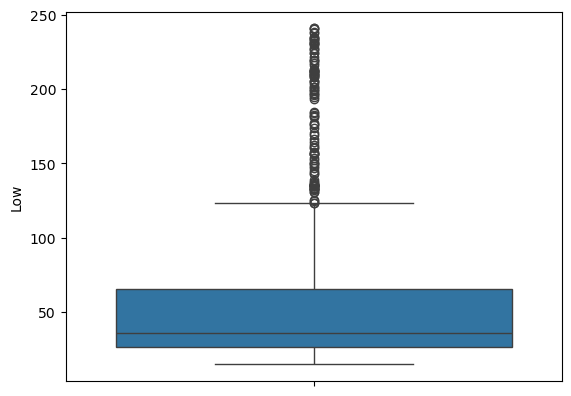

In [20]:
sns.boxplot(df['Low'])

In [21]:
df=df[df['High']<200]

<Axes: ylabel='Close'>

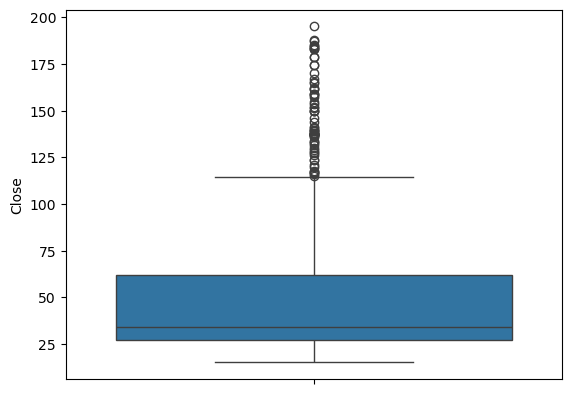

In [22]:
sns.boxplot(df['Close'])

In [23]:
df=df[df['Close']<150]

<h3>"Corelation between the Features "</h3>

In [25]:
df.corr()

,Open,High,Low,Close,Volume
Open,1.000000,0.998429,0.998609,0.997173,-0.542221
High,0.998429,1.000000,0.997595,0.998735,-0.531838
Low,0.998609,0.997595,1.000000,0.998353,-0.552446
Close,0.997173,0.998735,0.998353,1.000000,-0.542314
Volume,-0.542221,-0.531838,-0.552446,-0.542314,1.000000


<Axes: >

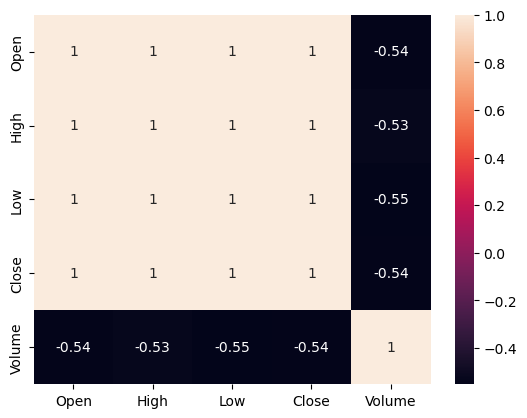

In [26]:
sns.heatmap(df.corr(),annot=True)

<h3>"Pair wise Relationship"</h3>

<Figure size 600x600 with 0 Axes>

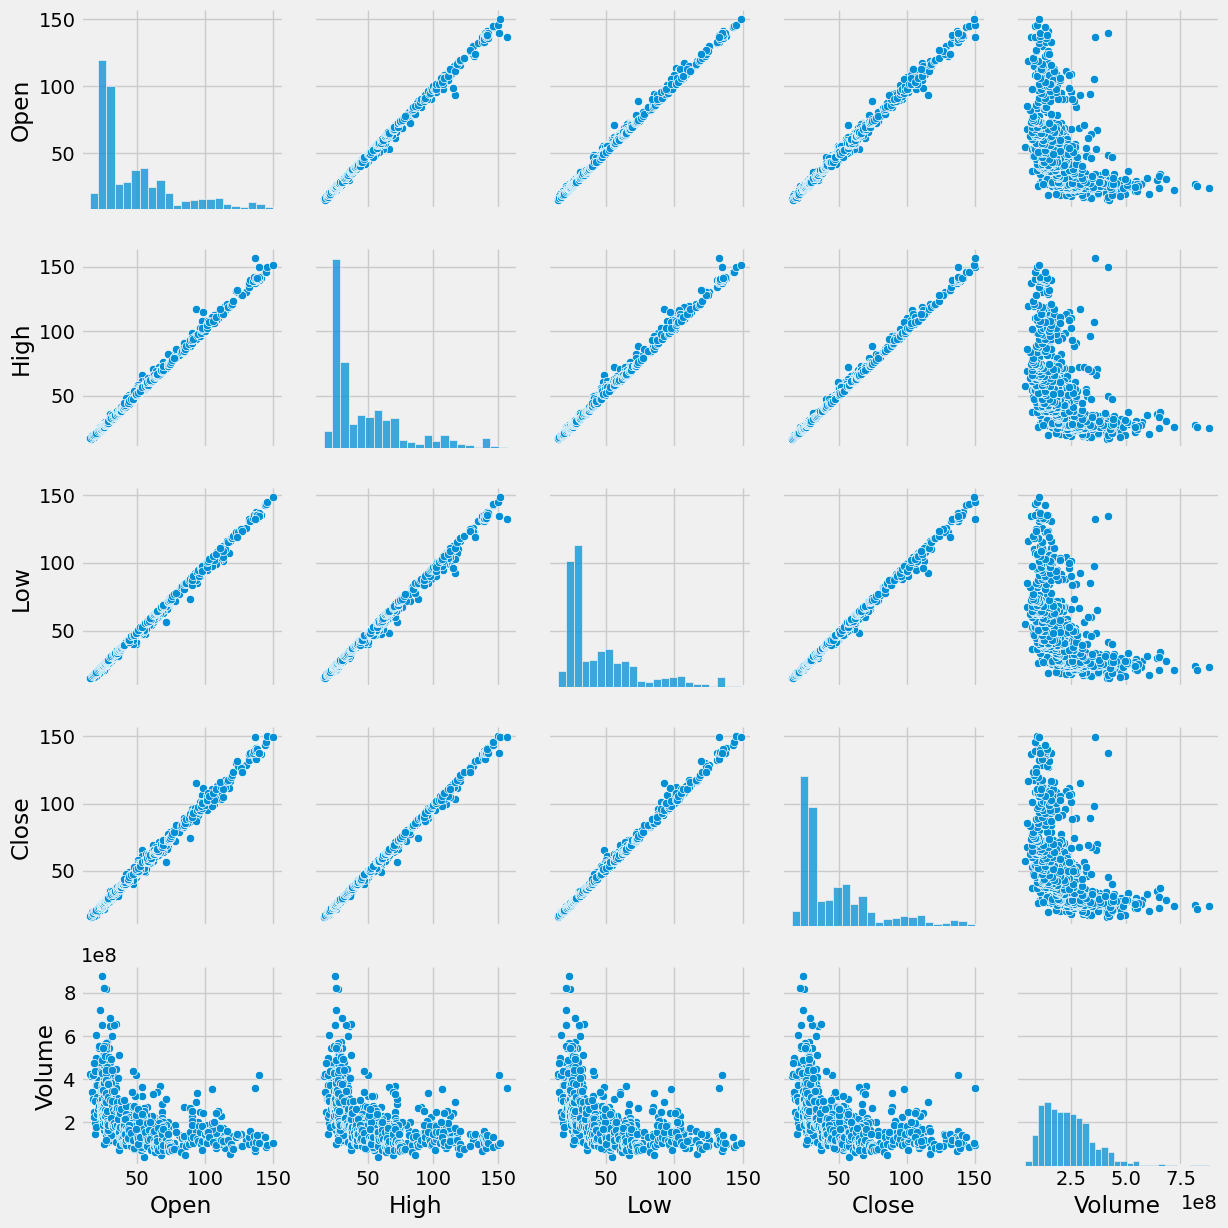

In [28]:
plt.style.use('fivethirtyeight')
plt.figure(figsize=(6,6))
sns.pairplot(df)
plt.tight_layout()

<h3>"Distribution of the features"</h3>

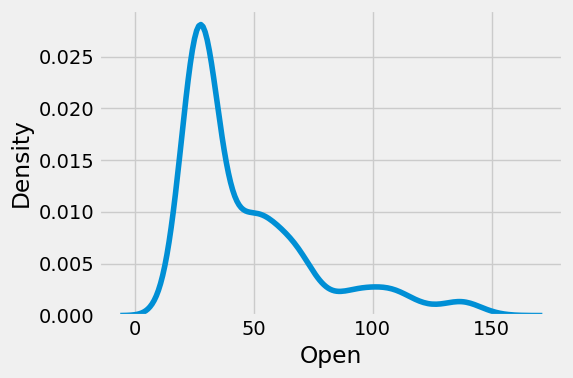

In [30]:
plt.style.use('fivethirtyeight')
plt.figure(figsize=(6,4))
sns.kdeplot(df['Open'])
plt.tight_layout()

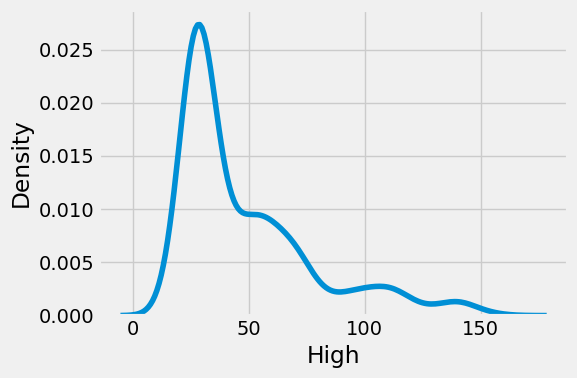

In [31]:
plt.style.use('fivethirtyeight')
plt.figure(figsize=(6,4))
sns.kdeplot(df['High'])
plt.tight_layout()

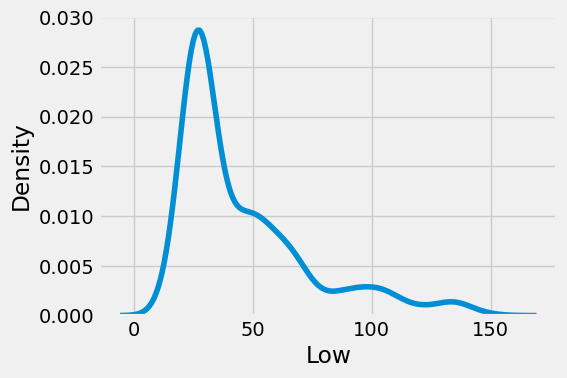

In [32]:
plt.style.use('fivethirtyeight')
plt.figure(figsize=(6,4))
sns.kdeplot(df['Low'])
plt.tight_layout()

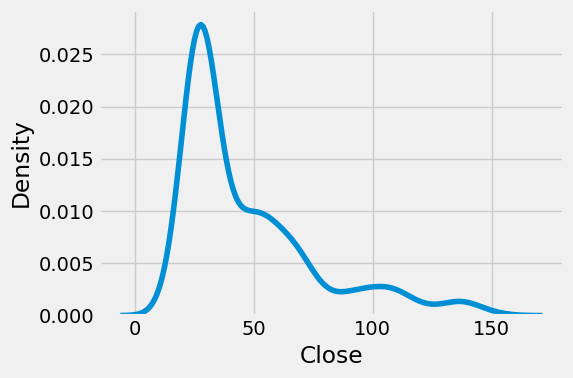

In [33]:
plt.style.use('fivethirtyeight')
plt.figure(figsize=(6,4))
sns.kdeplot(df['Close'])
plt.tight_layout()

<h2>"Feature Engineering & Preprocessed Data Readiness"</h2>

In [35]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

<h4>Dividing Input and Output Column</h4>

In [37]:
x=df.iloc[:,0:4]
y=df.iloc[:,-1]

<h3>"Feature Scaling"</h3>

In [39]:
ss=StandardScaler()

In [40]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [41]:
x_train_trans=ss.fit_transform(x_train)

In [42]:
x_test_trans=ss.fit_transform(x_test)

In [43]:
x_train_trans

array([[ 0.4496099 ,  0.4026279 ,  0.44574571,  0.39236757],
       [ 2.41713541,  2.47049646,  2.52107619,  2.43151296],
       [-0.6031796 , -0.62993693, -0.60003615, -0.62370984],
       ...,
       [ 0.48754826,  0.54915898,  0.53051933,  0.57552016],
       [ 3.44182241,  3.46916741,  3.55567514,  3.58215858],
       [ 0.09270829,  0.07156351,  0.11891633,  0.10156042]])

In [44]:
x_test_trans

array([[-0.77737569, -0.7812368 , -0.75346621, -0.7660749 ],
       [ 2.33998897,  2.24942873,  2.35972476,  2.32062557],
       [ 0.38435779,  0.35747769,  0.43194801,  0.38847409],
       [ 2.24096967,  2.13809816,  2.223153  ,  2.11273803],
       [ 0.78182963,  0.83957583,  0.74954009,  0.8877478 ],
       [-0.66127207, -0.61641406, -0.64879704, -0.60663718],
       [-0.70659781, -0.71336861, -0.69001949, -0.6942592 ],
       [-0.36421417, -0.37737094, -0.34195864, -0.36438806],
       [ 0.64201717,  0.59184024,  0.62802348,  0.60082864],
       [-0.41232918, -0.43520935, -0.41684011, -0.43001868],
       [-0.73379325, -0.70467613, -0.70579155, -0.71934316],
       [-0.58456698, -0.59367989, -0.56599369, -0.57983515],
       [ 0.36169492,  0.34410464,  0.32620347,  0.39500279],
       [-0.55527958, -0.56526218, -0.5405433 , -0.56815222],
       [-0.07029421, -0.08550431, -0.0354787 , -0.07643805],
       [-0.68986215, -0.67793005, -0.66421065, -0.66230294],
       [-0.77249445, -0.

<h3>"Model Training"</h3>

In [46]:
from sklearn.linear_model import (LinearRegression, Ridge, Lasso, ElasticNet, Lars, LassoLars, 
                                  OrthogonalMatchingPursuit, BayesianRidge, ARDRegression, SGDRegressor, 
                                  PassiveAggressiveRegressor, HuberRegressor, RANSACRegressor, TheilSenRegressor) 
from sklearn.tree import DecisionTreeRegressor 
from sklearn.ensemble import (RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor, 
                              BaggingRegressor, ExtraTreesRegressor, HistGradientBoostingRegressor, 
                              StackingRegressor, VotingRegressor) 
from sklearn.svm import SVR, NuSVR, LinearSVR 
from sklearn.neighbors import KNeighborsRegressor 
from sklearn.gaussian_process import GaussianProcessRegressor 
from sklearn.cross_decomposition import PLSRegression 
from sklearn.kernel_ridge import KernelRidge
import xgboost as xgb  
from sklearn.metrics import (r2_score, mean_absolute_error, mean_squared_error, mean_squared_log_error)

In [47]:
model = [  
    LinearRegression(), Ridge(), Lasso(), ElasticNet(), Lars(), LassoLars(),
    OrthogonalMatchingPursuit(), BayesianRidge(), ARDRegression(), SGDRegressor(),
    PassiveAggressiveRegressor(), HuberRegressor(), RANSACRegressor(), TheilSenRegressor(),
    DecisionTreeRegressor(),
    RandomForestRegressor(), GradientBoostingRegressor(), AdaBoostRegressor(),
    BaggingRegressor(), ExtraTreesRegressor(), HistGradientBoostingRegressor(),
    StackingRegressor(estimators=[("lr", LinearRegression()), ("dt", DecisionTreeRegressor())]),
    VotingRegressor(estimators=[("rf", RandomForestRegressor()), ("gb", GradientBoostingRegressor())]),
    SVR(), NuSVR(), LinearSVR(),
    KNeighborsRegressor(),
    GaussianProcessRegressor(),
    PLSRegression(),
    KernelRidge(),
    xgb.XGBRegressor()
]

In [48]:
models = [
    "LinearRegression", "Ridge", "Lasso", "ElasticNet", "Lars", "LassoLars", 
    "OrthogonalMatchingPursuit", "BayesianRidge", "ARDRegression", "SGDRegressor", 
    "PassiveAggressiveRegressor", "HuberRegressor", "RANSACRegressor", "TheilSenRegressor", 
    "DecisionTreeRegressor", 
    "RandomForestRegressor", "GradientBoostingRegressor", "AdaBoostRegressor", 
    "BaggingRegressor", "ExtraTreesRegressor", "HistGradientBoostingRegressor", 
    "StackingRegressor", "VotingRegressor", 
    "SVR", "NuSVR", "LinearSVR", 
    "KNeighborsRegressor", 
    "GaussianProcessRegressor", 
    "PLSRegression", 
    "IsotonicRegression", 
    "KernelRidge", "XGBRegressor"
]

In [49]:
scores=[]

In [50]:
for reg in model:
    reg.fit(x_train_trans,y_train)
    y_pred=reg.predict(x_test_trans)
    scores.append(r2_score(y_test,y_pred))

In [51]:
for i,j in zip(models,scores):
    print(i,':',j)

LinearRegression : 0.356909979110535
Ridge : 0.33548825393185344
Lasso : 0.34490538702322127
ElasticNet : 0.23225066474799683
Lars : 0.3569099791105428
LassoLars : 0.35690994362064987
OrthogonalMatchingPursuit : 0.2462122687813768
BayesianRidge : -0.014231287326133657
ARDRegression : -0.014231287326133657
SGDRegressor : 0.24841200339657266
PassiveAggressiveRegressor : -4.22091040782811
HuberRegressor : 0.06345583869320959
RANSACRegressor : 0.06483899751572886
TheilSenRegressor : -0.07118073468344432
DecisionTreeRegressor : 0.47135350718745717
RandomForestRegressor : 0.5241004450545612
GradientBoostingRegressor : 0.510551747822078
AdaBoostRegressor : 0.4575795358797572
BaggingRegressor : 0.4809313516826279
ExtraTreesRegressor : 0.5487543085433654
HistGradientBoostingRegressor : 0.5481179036173125
StackingRegressor : -162496231.5684635
VotingRegressor : 0.5281282428903058
SVR : -0.0552933044113364
NuSVR : -0.04252702981682788
LinearSVR : -4.249422286725787
KNeighborsRegressor : 0.4734074

<h3>Hyperparameter Tuning</h3>

In [55]:
import optuna

In [57]:
def objective(trial):
    params = {
        "learning_rate": trial.suggest_loguniform("learning_rate", 0.005, 0.5),
        "max_iter": trial.suggest_int("max_iter", 200, 1500),
        "max_depth": trial.suggest_int("max_depth", 3, 20),
        "min_samples_leaf": trial.suggest_int("min_samples_leaf", 1, 100),
        "max_leaf_nodes": trial.suggest_int("max_leaf_nodes", 10, 300),
        "l2_regularization": trial.suggest_loguniform("l2_regularization", 1e-6, 1e-1),
    }
    model = HistGradientBoostingRegressor(**params, random_state=42)
    model.fit(x_train_trans, y_train)
    y_pred = model.predict(x_test_trans)
    return r2_score(y_test, y_pred)


In [ ]:
study = optuna.create_study(direction="maximize")
study.optimize(objective, n_trials=50)

[I 2025-03-05 13:12:04,977] A new study created in memory with name: no-name-fd84c457-2cf4-43ea-aadf-a191374c2118
[I 2025-03-05 13:12:07,162] Trial 0 finished with value: 0.4702239864602057 and parameters: {'learning_rate': 0.20386918752062633, 'max_iter': 1277, 'max_depth': 5, 'min_samples_leaf': 14, 'max_leaf_nodes': 60, 'l2_regularization': 1.1001317129244555e-06}. Best is trial 0 with value: 0.4702239864602057.
[I 2025-03-05 13:12:10,084] Trial 1 finished with value: 0.3695067800994757 and parameters: {'learning_rate': 0.37912066679568407, 'max_iter': 706, 'max_depth': 20, 'min_samples_leaf': 24, 'max_leaf_nodes': 110, 'l2_regularization': 0.0001162590690680238}. Best is trial 0 with value: 0.4702239864602057.
[I 2025-03-05 13:12:11,728] Trial 2 finished with value: 0.4801479517174986 and parameters: {'learning_rate': 0.42616942461676094, 'max_iter': 927, 'max_depth': 18, 'min_samples_leaf': 85, 'max_leaf_nodes': 275, 'l2_regularization': 0.0014301191996471535}. Best is trial 2 wit

<h3>" Model Evaluation & Performance Metrics"</h3>

In [ ]:
best_params = study.best_params
final_model = HistGradientBoostingRegressor(**best_params, random_state=42)
final_model.fit(x_train_trans, y_train)
y_pred = final_model.predict(x_test_trans)

In [ ]:
new_r2 = r2_score(y_test, y_pred)
print("Optimized R² Score:", new_r2)

<h2>"Model Pickle"</h2>

In [ ]:
import pickle

In [ ]:
pickle.dump(final_model,open('alpha.pkl','wb'))